In [1]:
import folium
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from PIL import Image
from wordcloud import WordCloud, STOPWORDS


%matplotlib inline
mpl.style.use(['ggplot'])
plt.style.use('fivethirtyeight')

In [2]:

london_crime_data=pd.read_csv('archive/london_crime_by_lsoa.csv')


In [3]:
london_crime_data.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [4]:
print('data shape:' , london_crime_data.shape)
print('data columns:' , london_crime_data.columns)
print('data index:', london_crime_data.index)

data shape: (13490604, 7)
data columns: Index(['lsoa_code', 'borough', 'major_category', 'minor_category', 'value',
       'year', 'month'],
      dtype='object')
data index: RangeIndex(start=0, stop=13490604, step=1)


In [5]:
london_crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [6]:
london_crime_data.isnull().any()

lsoa_code         False
borough           False
major_category    False
minor_category    False
value             False
year              False
month             False
dtype: bool

In [7]:
london_crime_data.drop(['lsoa_code'], axis=1, inplace=True)
london_crime_data.head()

,borough,major_category,minor_category,value,year,month
0,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,Bromley,Violence Against the Person,Other violence,0,2015,5
3,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,Wandsworth,Robbery,Personal Property,0,2008,6


In [8]:
london_crime_data.describe()

,value,year,month
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


In [9]:
london_crime_data[london_crime_data['major_category'] == 'Theft and Handling']

,borough,major_category,minor_category,value,year,month
5,Ealing,Theft and Handling,Other Theft,0,2012,5
9,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
10,Haringey,Theft and Handling,Motor Vehicle Interference & Tampering,0,2013,12
14,Hillingdon,Theft and Handling,Theft/Taking Of Motor Vehicle,0,2016,2
16,Barking and Dagenham,Theft and Handling,Other Theft Person,1,2009,5
...,...,...,...,...,...,...
13490590,Greenwich,Theft and Handling,Theft/Taking Of Motor Vehicle,1,2012,4
13490593,Wandsworth,Theft and Handling,Handling Stolen Goods,0,2014,12
13490596,Bromley,Theft and Handling,Theft From Shops,0,2010,7
13490597,Brent,Theft and Handling,Theft/Taking of Pedal Cycle,0,2014,10


In [10]:
df_year = london_crime_data.groupby('year').sum()[['value']]
df_year

,value
year,
2008,738641
2009,717214
2010,715324
2011,724915
2012,737329
2013,686407
2014,680183
2015,711624
2016,736121


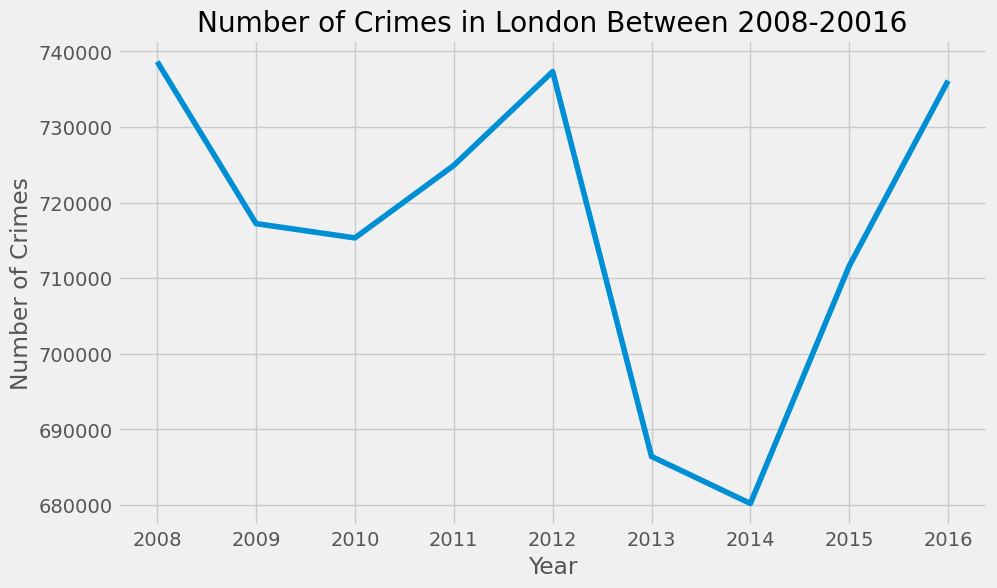

In [11]:
ax = df_year.plot(kind='line', figsize=(10,6))

ax.set_title('Number of Crimes in London Between 2008-20016')
ax.set_ylabel('Number of Crimes')
ax.set_xlabel('Year')
ax.legend().set_visible(False)

plt.show() 

In [12]:
df_year.reset_index('year', inplace=True)
df_year

,year,value
0,2008,738641
1,2009,717214
2,2010,715324
3,2011,724915
4,2012,737329
5,2013,686407
6,2014,680183
7,2015,711624
8,2016,736121


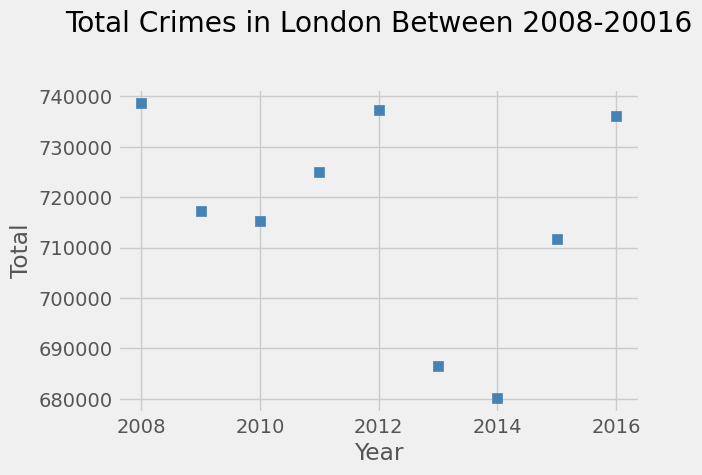

In [13]:
df_year.plot(kind='scatter', x='year', y='value', figsize=(6,4), color = 'steelblue', marker= 's', s=50)
plt.title('Total Crimes in London Between 2008-20016', y=1.15)
plt.ylabel('Total')
plt.xlabel('Year')

plt.show()

Terlihat dari line grafik dan scatter plot diatas, diketahui 
1. angka kejahatan tertinggi di london berada pada tahun 2008
2. angka kejahatan terendah di london berada pada tahun 2014
3. angka kejahatan yang mengalami kenaikan yang cukup signifikan ada pada tahun 2014 ke tahun 2015

In [14]:
df_major = london_crime_data.groupby('major_category').sum()[['value']]
df_major.sort_values(by='value', ascending=False, inplace=True)
df_major

,value
major_category,
Theft and Handling,2661861
Violence Against the Person,1558081
Burglary,754293
Criminal Damage,630938
Drugs,470765
Robbery,258873
Other Notifiable Offences,106349
Fraud or Forgery,5325
Sexual Offences,1273


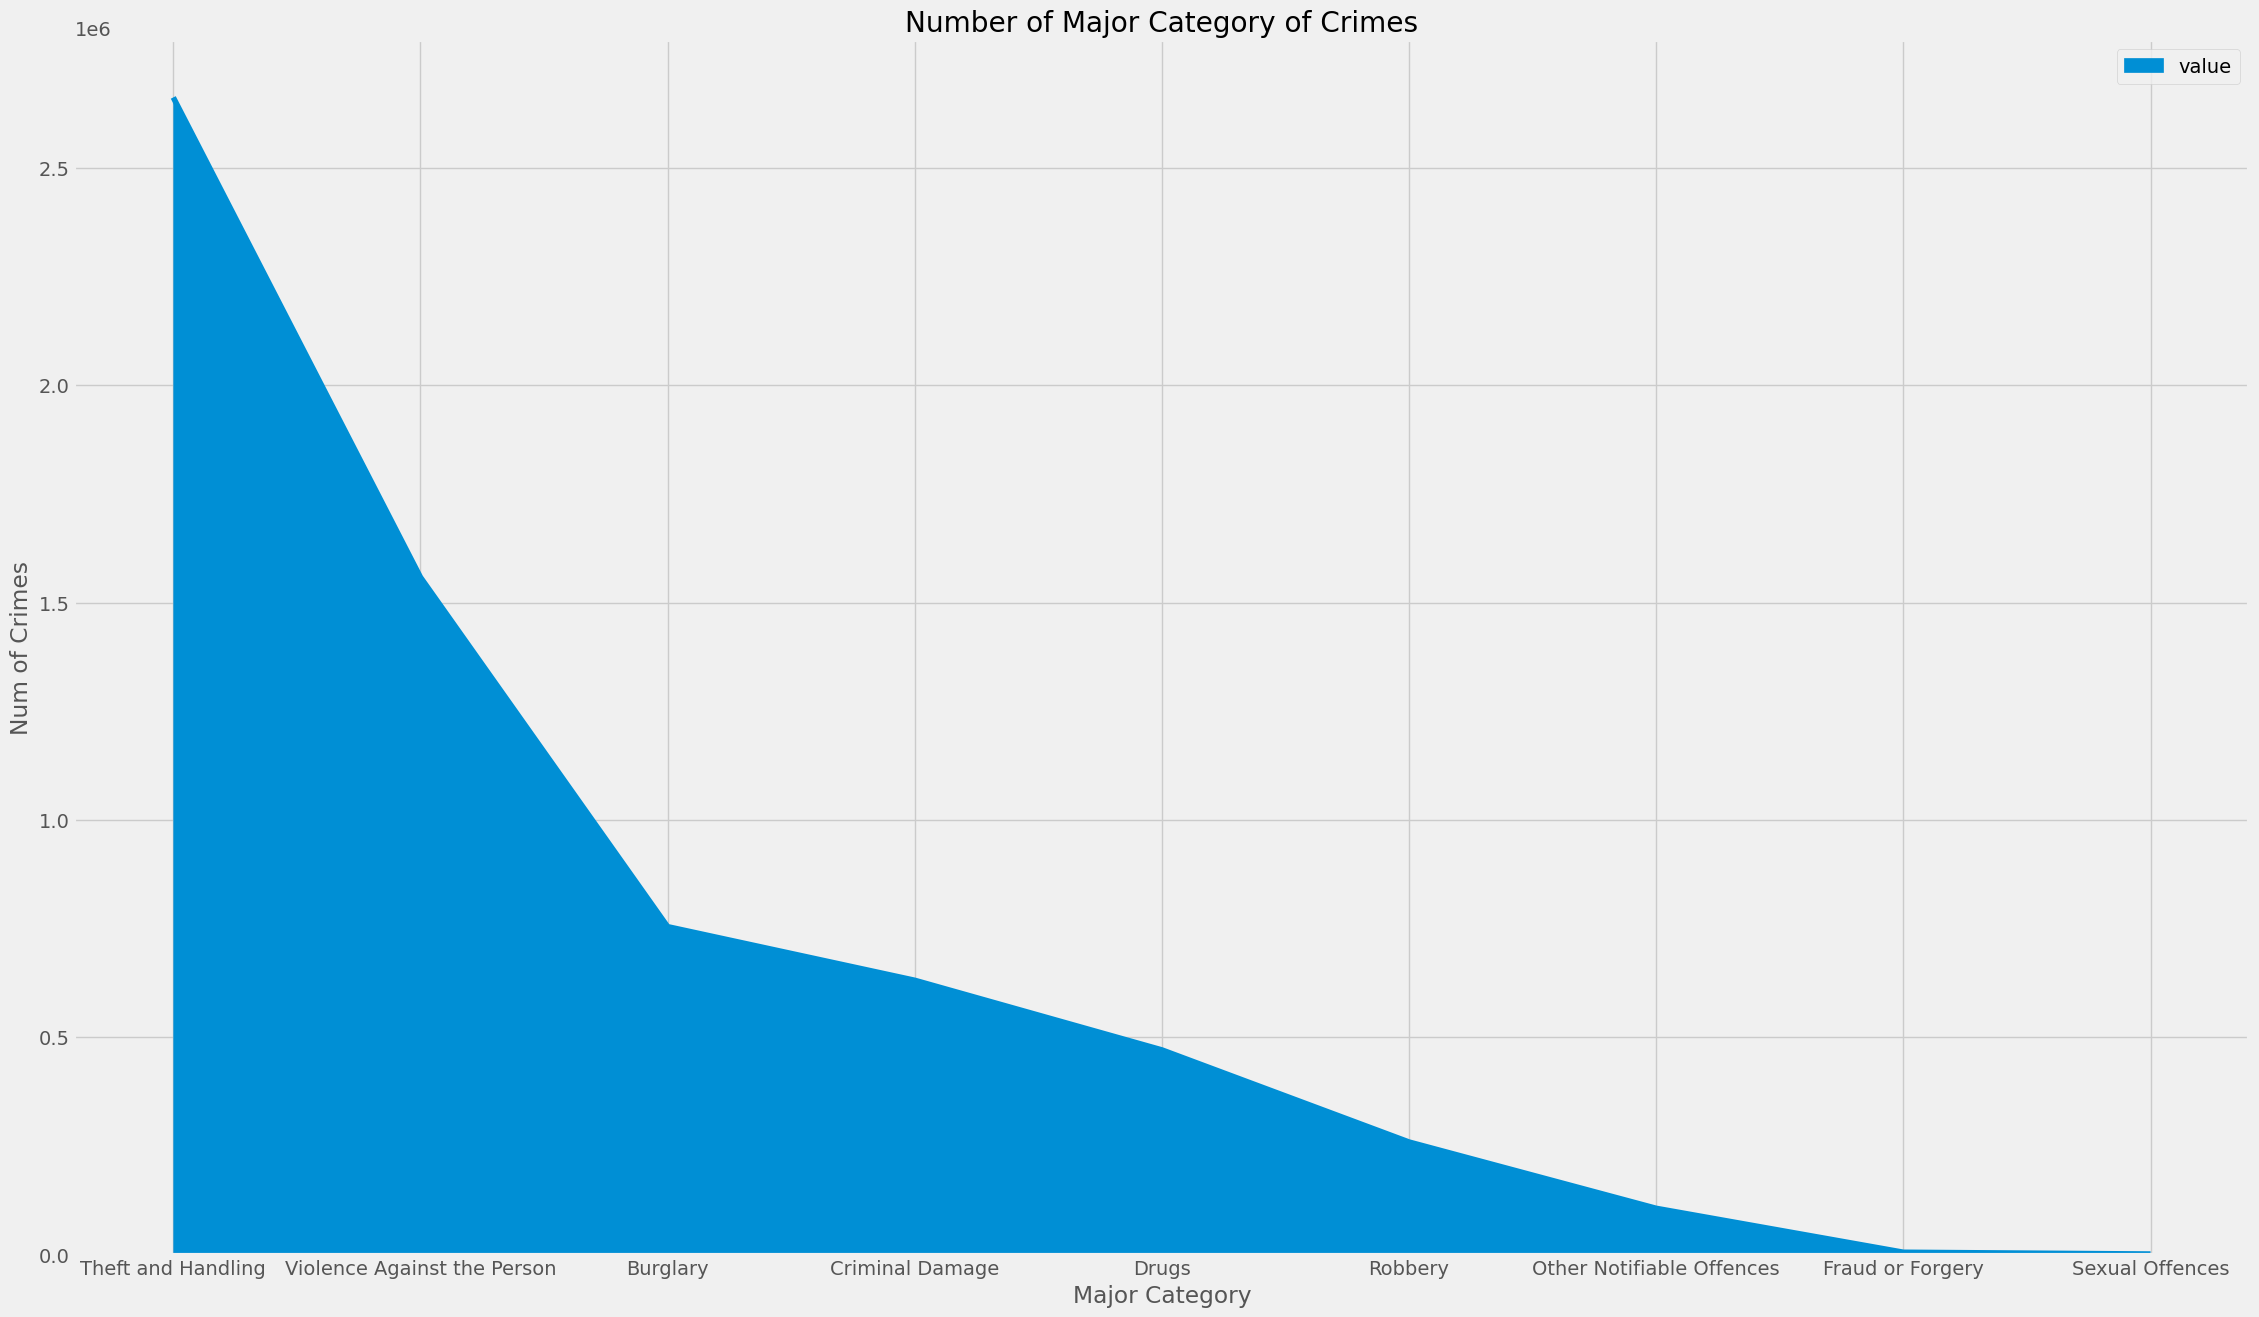

In [15]:
df_major.plot(kind='area', stacked=True, figsize=(25,15))

plt.title('Number of Major Category of Crimes')
plt.ylabel('Num of Crimes')
plt.xlabel('Major Category')


plt.show()

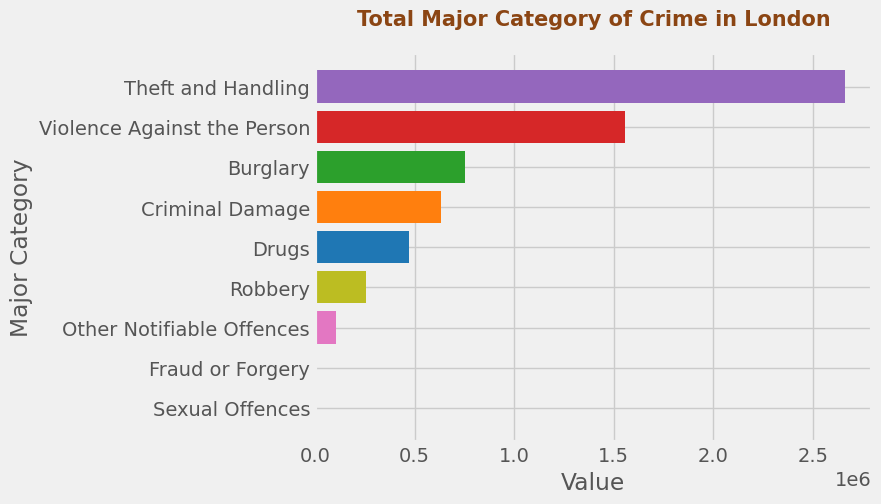

In [16]:

df_major.sort_values(by='value', ascending=True, inplace=True)

fig, ax = plt.subplots()

category = df_major.index
counts = df_major['value']
bar_colors = ['tab:gray', 'tab:brown', 'tab:pink', 'tab:olive', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']
font1 = {'color':  'saddlebrown',
        'weight': 'bold',
        'size': 15}

ax.barh(category, counts, color = bar_colors)
ax.set_title('Total Major Category of Crime in London', y=1.05, fontdict=font1)
ax.set_ylabel('Major Category')
ax.set_xlabel('Value')

plt.show()

Berdasarkan grafik area dan bar plot, diketahui bahwa
1. kategorisasi kejahatan yang ada ditingkat tertinggi yaitu Theft & Handling
2. kategorisasi kejahatan yang ada ditingkat tertinggi kedua yaitu Violence against the person
3. kategori kejahatan yang jarang terjadi yaitu Fraud or forgery dan sexuak offences

In [17]:
df_major1 = london_crime_data.groupby(['major_category','year', 'month']).agg({'value' : 'sum'})

TheftnHandling_2016 = df_major1.loc['Theft and Handling', 2016]
TheftnHandling_2016


,value
month,
1,22316
2,22028
3,23117
4,23149
5,25374
6,24722
7,25837
8,25176
9,24999


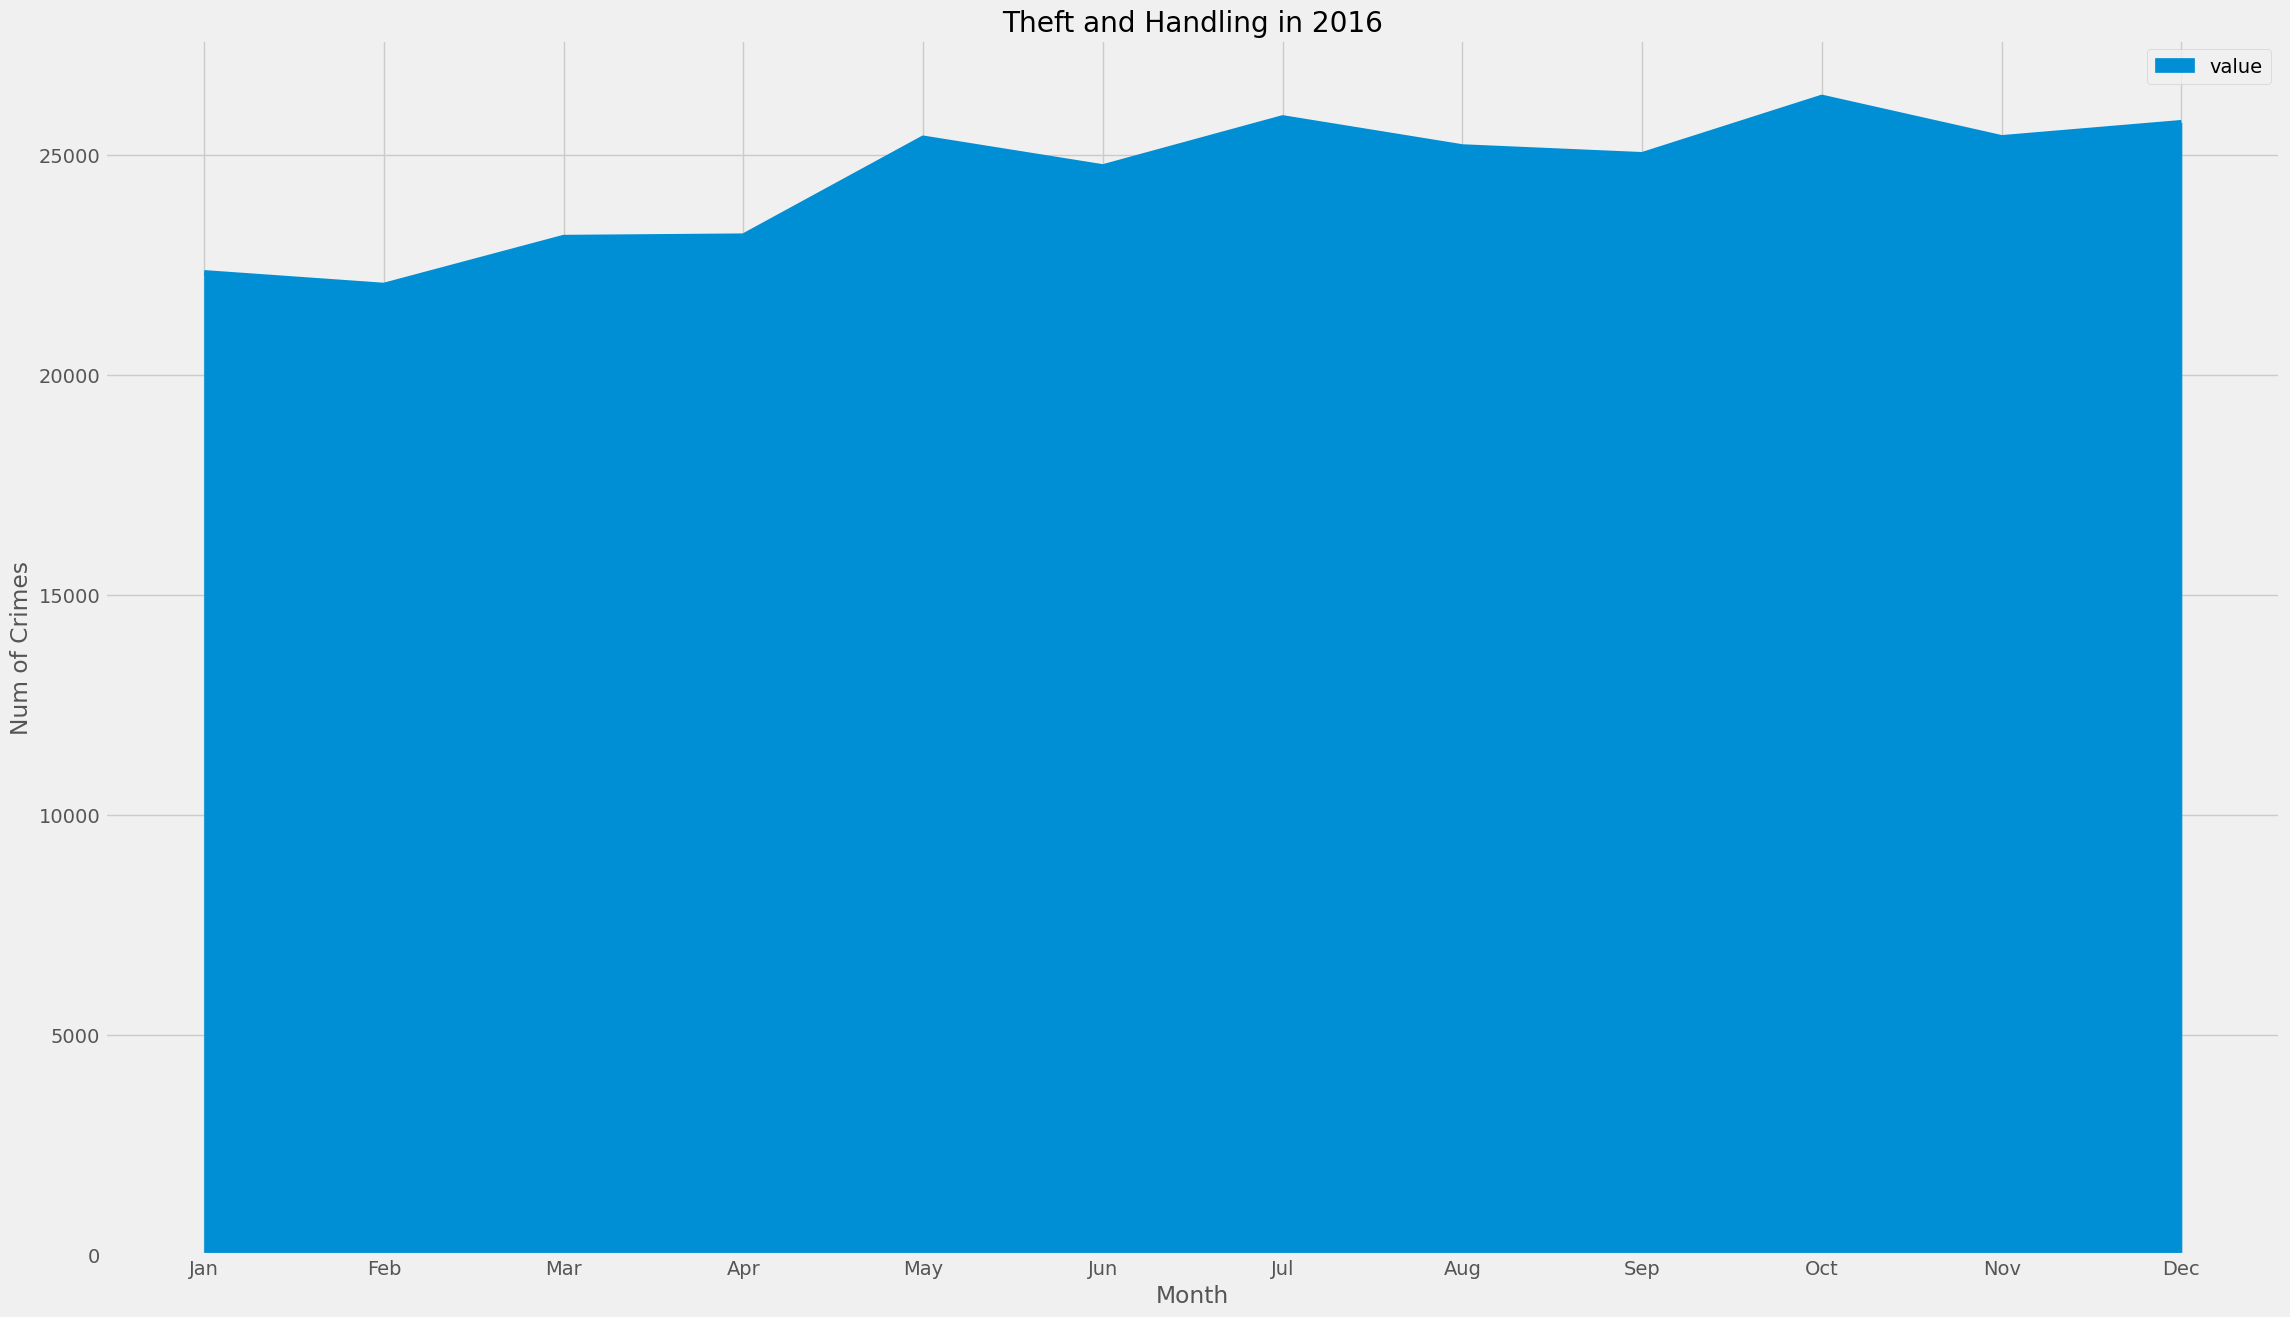

In [18]:
months = range(1, 13)
name_of_months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

TheftnHandling_2016.plot(kind='area', stacked=True, figsize=(25,15))

plt.title('Theft and Handling in 2016')
plt.ylabel('Num of Crimes')
plt.xlabel('Month')
plt.xticks(months, name_of_months )

plt.show()

Berdasarkan grafik diketahui bahwa pada tahun 2016 theft & handling pada bulan oktober menjadi bulan terbanyak untuk kategori kejahatan theft & handling sedangkan pada bulan febuari terdata menjadi bulan yang lebih rendah grafik data kejahatan theft & handling.

In [19]:
df_major2 = london_crime_data.groupby(['major_category','year']).agg({'value' : 'sum'})
df_major2.sort_values(by='value', ascending=False, axis=0, inplace=True)
df_major2.head(20)

value
major_category              year        
Theft and Handling          2012  334054
                            2011  309292
                            2013  306372
                            2016  294133
                            2010  290924
                            2015  284022
                            2008  283692
                            2014  279880
                            2009  279492
Violence Against the Person 2016  232381
                            2015  218740
                            2014  185349
                            2009  160777
                            2008  159844
                            2010  157894
                            2012  150014
                            2011  146901
                            2013  146181
Burglary                    2012   93392
                            2011   93315

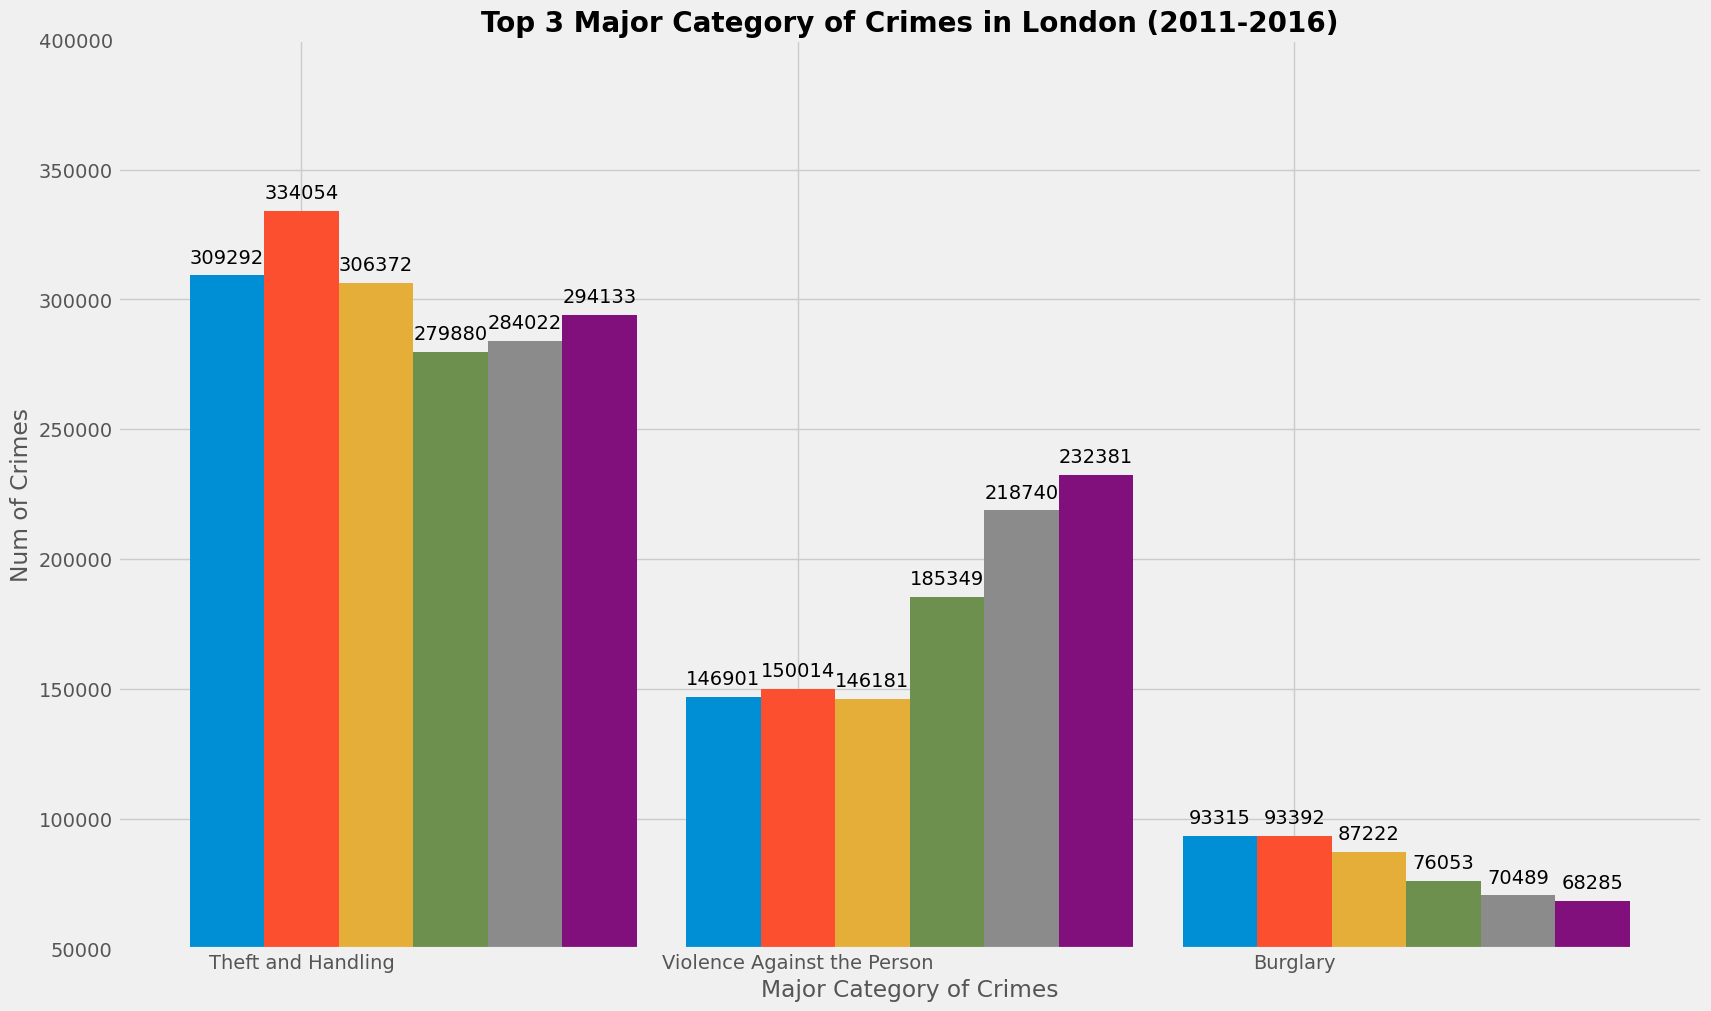

In [20]:
category = ['Theft and Handling', 'Violence Against the Person', 'Burglary']
years = {
    2011 : (309292, 146901, 93315),
    2012 : (334054, 150014, 93392),
    2013 : (306372, 146181, 87222),
    2014 : (279880, 185349, 76053),
    2015 : (284022, 218740, 70489),
    2016 : (294133, 232381, 68285),
}
x = np.arange(len(category))
width= 0.15
multiplier = 0

fig, ax = plt.subplots(layout = 'constrained', figsize = (17,10))

for attribute, measurement in years.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=6)
    multiplier += 1

font2 = {'color':  'black',
        'weight': 'bold',
        'size': 20}
ax.set_ylabel('Num of Crimes')
ax.set_xlabel('Major Category of Crimes')
ax.set_title('Top 3 Major Category of Crimes in London (2011-2016)', fontdict=font2)
ax.set_xticks(x + width, category)

ax.set_ylim(50000, 400000)


plt.show()


Berdasarkan Grafik, diketahui bahwa data tingkat kejahatan theft & handling menjadi kategori kejahatan yang terdata paling banyak, disusul oleh kategori kejahatan violence against the person yang menjadi kategori dua teratas dan kategori top 3 terakhir ditempati oleh kategori burglary di tahun 2011-2016.

In [21]:
london_crime_data.head()

,borough,major_category,minor_category,value,year,month
0,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,Bromley,Violence Against the Person,Other violence,0,2015,5
3,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,Wandsworth,Robbery,Personal Property,0,2008,6


In [22]:
df_minor = london_crime_data.groupby('minor_category').sum()[['value']]
df_minor

,value
minor_category,
Assault with Injury,451001
Burglary in Other Buildings,263011
Burglary in a Dwelling,491282
Business Property,21295
Common Assault,413690
Counted per Victim,3840
Criminal Damage To Dwelling,154116
Criminal Damage To Motor Vehicle,265463
Criminal Damage To Other Building,66003


In [23]:
year_2014 = pd.Series([108577,52167,48975, 55330,45677], index=('Other Theft', 'Theft From Motor Vehicle', 'Burglary in a Dwelling','Harassment', 'Assault with Injury'))
year_2015 = pd.Series([107571, 50024, 44656, 71633, 48164], index=('Other Theft', 'Theft From Motor Vehicle', 'Burglary in a Dwelling','Harassment', 'Assault with Injury'))
year_2016 = pd.Series([103807, 51319, 42996, 78676, 50038], index=('Other Theft', 'Theft From Motor Vehicle', 'Burglary in a Dwelling','Harassment', 'Assault with Injury'))

df_minor1 = pd.DataFrame({
    '2014' : year_2014,
    '2015' : year_2015,
    '2016': year_2016,
})
df_minor1

,2014,2015,2016
Other Theft,108577,107571,103807
Theft From Motor Vehicle,52167,50024,51319
Burglary in a Dwelling,48975,44656,42996
Harassment,55330,71633,78676
Assault with Injury,45677,48164,50038


Histogram diatas menjabarkan mengenai kategoris kejahatan paling rendah

In [24]:
df_minor.describe()

,value
count,32.000000
mean,201492.437500
std,225149.900652
min,268.000000
25%,19996.250000
50%,135456.000000
75%,317917.000000
max,980085.000000


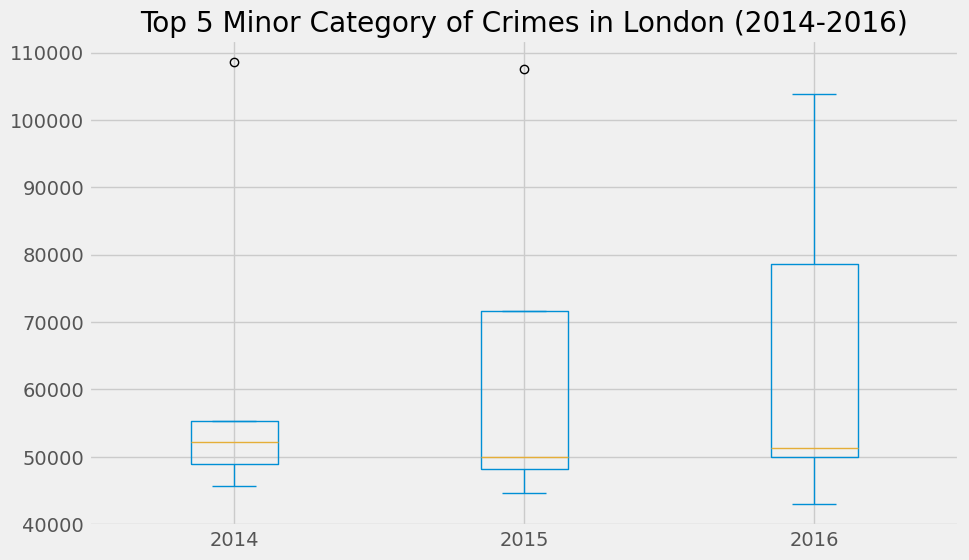

In [25]:
df_minor1.plot(kind='box', figsize=(10,6))
plt.title('Top 5 Minor Category of Crimes in London (2014-2016)')
plt.show()

Berdasarkan box plot di atas, dapat diketahui bahwa
1.Tahun 2014
Q1 = 48975
Q3 = 55330
IQR = Q3-Q1 = 6355
Outlier > 55330 + (1.5 * 6355) = 64862.5
Other Theft merupakan outlier karena memiiki angka kejahatan yang lebih dari 64862.5
2.Tahun 2015
Q1 = 48164
Q3 = 71633
IQR = Q3-Q1 = 23469
Outlier > 71633 + (1.5 * 23469) = 106836.5
Other Theft merupakan outlier karena memiiki angka kejahatan yang lebih dari 106836.5
3. Tahun 2016
Q1 = 50038
Q3 = 78676
IQR = 28641
Outlier > 78676 + (1.5 * 28641) = 121637.5
Tidak ada outlier

In [26]:
borough_data = london_crime_data.groupby('borough').sum()
borough_data.sort_values(by='value', ascending=False, inplace=True)
borough_data

,value,year,month
borough,,,
Westminster,455028,737719920,2383290
Lambeth,292178,1044324576,3373812
Southwark,278809,972399600,3141450
Camden,275147,761405184,2459808
Newham,262024,948497040,3064230
Croydon,260294,1211425200,3913650
Ealing,251562,1105384752,3571074
Islington,230286,722726496,2334852
Tower Hamlets,228613,829201536,2678832


In [27]:
borough_top10 = borough_data['value'].head(10)
borough_top10

borough
Westminster      455028
Lambeth          292178
Southwark        278809
Camden           275147
Newham           262024
Croydon          260294
Ealing           251562
Islington        230286
Tower Hamlets    228613
Brent            227551
Name: value, dtype: int64

Text(0.5, 1.15, "Percentage of Crimes in Top 10 London's Boroughs")

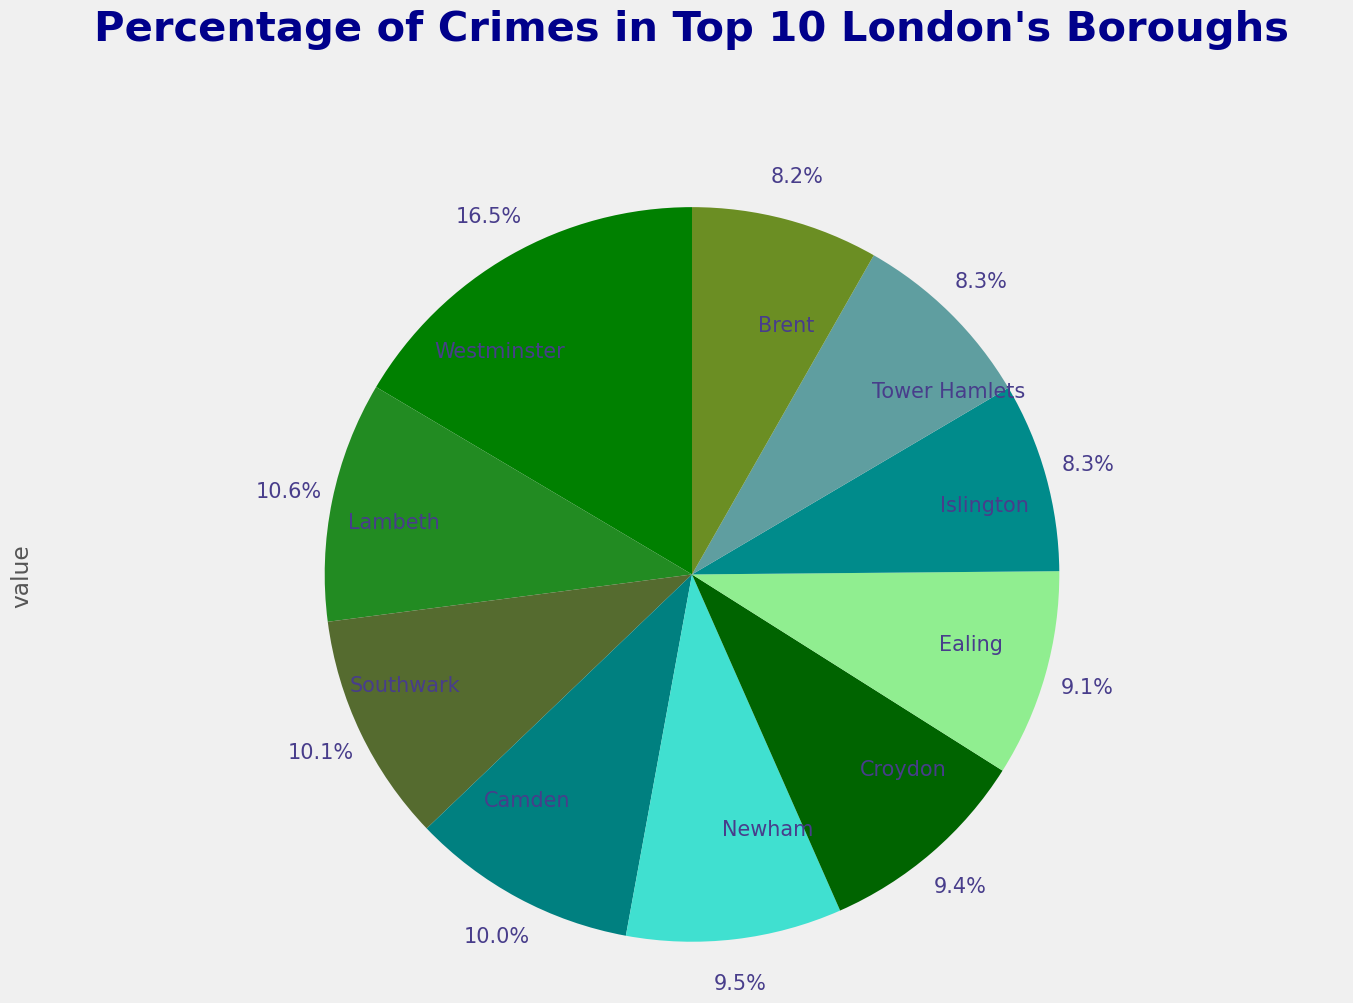

In [28]:
font1 = {'color':  'darkblue',
        'weight': 'bold',
        'size': 30,
        }
lable=borough_top10.index
ax = plt.axes()
ax.set_facecolor("lightblue")
borough_top10.plot(
    kind='pie',
    figsize=(15,10),
    autopct='%1.1f%%', 
    startangle=90, 
    shadow=False,
    pctdistance=1.12,
    labels = lable,
    labeldistance = 0.7,
    colors = ['green', 'forestgreen', 'darkolivegreen', 'teal', 'turquoise','darkgreen', 'lightgreen','darkcyan','cadetblue','olivedrab'],
    textprops={'fontsize': 15,'color':'darkslateblue'})

plt.axis('equal')
plt.title("Percentage of Crimes in Top 10 London's Boroughs", y=1.15, fontdict=font1)


Pie chart diatas mempersentasikan bahwa westminstre merepakan borough dengan total kejahatan tertinggi

In [29]:
df_borough= london_crime_data.groupby(['borough','year']).agg({'value' : 'sum'})
df_borough.sort_values(by='value', ascending=False, inplace=True)
df_borough.loc['Southwark']


,value
year,
2008,33470
2016,31636
2010,31320
2013,31128
2012,30737
2011,30723
2009,30623
2015,30260
2014,28912


In [30]:
Westminster = pd.Series([47846, 48456, 48116, 54243, 59226, 53852,  47564, 47395, 48330], index=range(2008,2017))
Lambeth = pd.Series([31717, 31225, 31671, 33224, 33473, 31868, 31765, 33164, 34071], index=range(2008,2017))
Southwark = pd.Series([33470, 30623, 31320, 30723, 30737, 31128, 28912, 30260, 31636], index=range(2008,2017))

borough_top3 = pd.DataFrame({
    'Westminster' : Westminster,
    'Lambeth': Lambeth,
    'Southwark': Southwark,
})
borough_top3

,Westminster,Lambeth,Southwark
2008,47846,31717,33470
2009,48456,31225,30623
2010,48116,31671,31320
2011,54243,33224,30723
2012,59226,33473,30737
2013,53852,31868,31128
2014,47564,31765,28912
2015,47395,33164,30260
2016,48330,34071,31636


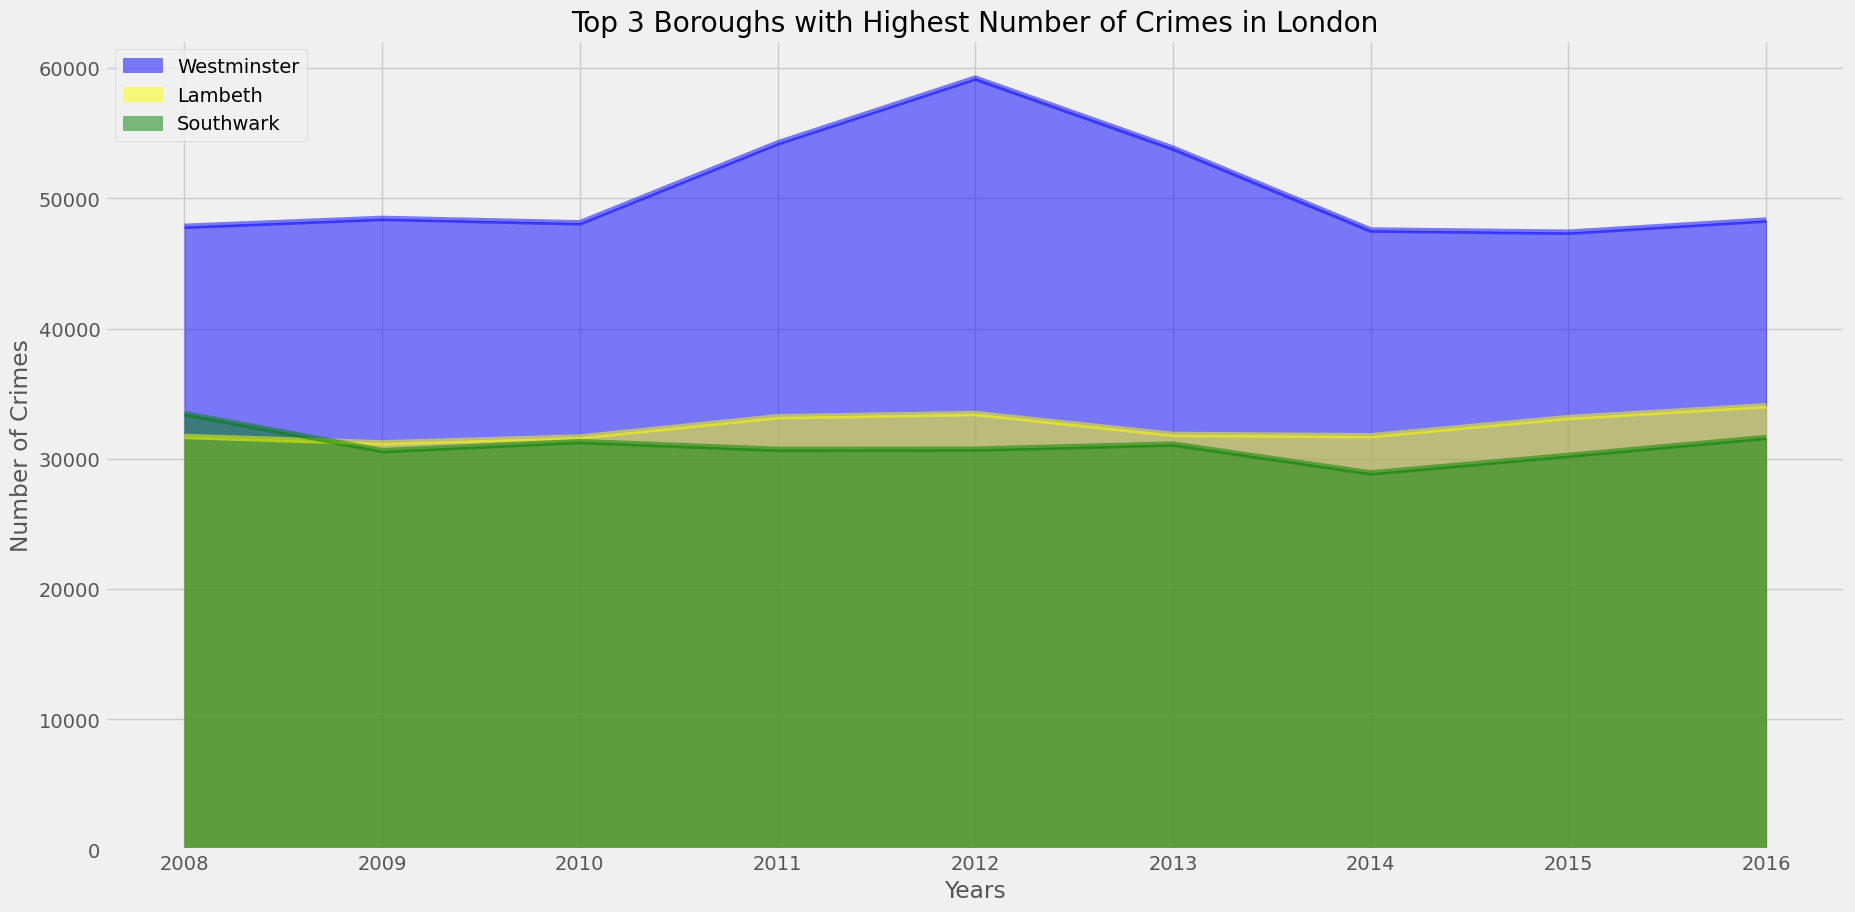

In [31]:
borough_top3.plot(kind='area', stacked=False, alpha=.5, figsize=(20,10), color=['blue', 'yellow', 'green'])
plt.title('Top 3 Boroughs with Highest Number of Crimes in London')
plt.ylabel('Number of Crimes')
plt.xlabel('Years')
plt.legend(loc='upper left')

plt.show()

Grafik plot diatas mempresentasikan bahwa
1. Borough kejahatan tertinggi, yaitu Westminster memiliki total kejahatan tertinggi pada tahun 2012, lonjakan angka kejahatan dari tahun 2011, dan penurunan angka kejahatan dari tahun 2013
2. Borough kejahatan kedua tertinggi, yaitu Lambeth memiliki total kejahatan tertinggi pada tahun 2016
3. Borough kejahatan kedua tertinggi, yaitu Southwark memiliki total kejahatan tertinggi pada tahun 2008
4. Lambeth dan Southwark memiliki angka kejahatan yang mirip pada tahun 2008-2010 dan tahun 2014-2016

In [32]:
borough_data

,value,year,month
borough,,,
Westminster,455028,737719920,2383290
Lambeth,292178,1044324576,3373812
Southwark,278809,972399600,3141450
Camden,275147,761405184,2459808
Newham,262024,948497040,3064230
Croydon,260294,1211425200,3913650
Ealing,251562,1105384752,3571074
Islington,230286,722726496,2334852
Tower Hamlets,228613,829201536,2678832


#total kejahatan london tahun 2008-2016

In [33]:
total_crimes= borough_data['value'].sum()
total_crimes

6447758

In [34]:
max_words = 50
word_string = ''
for borough in borough_data.index.values:
    if len (borough.split(' ')) == 1:
        repeat_num_times = int(borough_data.loc[borough,'value']/float(total_crimes)*max_words)
        word_string = word_string + ((borough + ' ')* repeat_num_times)
word_string

'Westminster Westminster Westminster Lambeth Lambeth Southwark Southwark Camden Camden Newham Newham Croydon Croydon Ealing Islington Brent Hackney Lewisham Haringey Barnet Hillingdon Wandsworth Enfield Hounslow Bromley Redbridge Greenwich Havering '

(-0.5, 399.5, 199.5, -0.5)

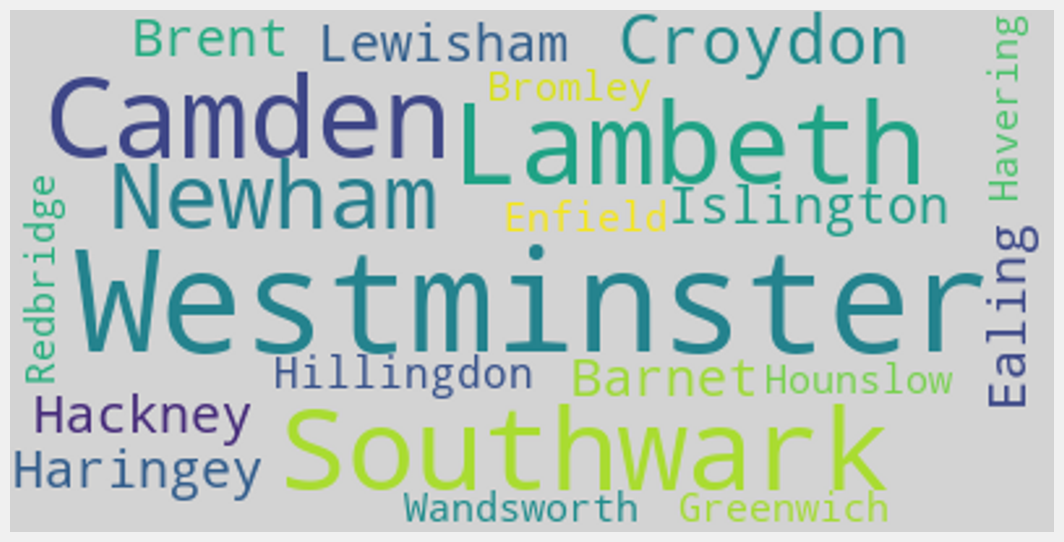

In [35]:
wodcloud = WordCloud(background_color='lightgray').generate(word_string)
fig = plt.figure()
fig.set_figwidth(12)
fig.set_figheight(14)
plt.imshow(wodcloud, interpolation='catrom')
plt.axis('off')

WordCloud mempresentasikan bahwa mayoritas tindak data kejahatan di london terjadi di Westminister, southwark, lambeth dan lainnya.

In [36]:
latitude = 51.509865
longitude= -0.118092
london_map = folium.Map(location=[latitude, longitude], zoom_start=10)
london_map

In [37]:
!wget --quiet https://raw.githubusercontent.com/radoi90/housequest-data/master/london_boroughs.geojson

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [38]:
world_geo = r'archive/london_boroughs.json'
world_map= folium.Map(location=[54.237933,-2.36967],zoom_start=5, tiles='Stamen Terrain')

world_map.choropleth(
    geo_data = world_geo,
    data = london_crime_data[['borough', 'value']],
    columns=['borough', 'value'],
    key_on = 'feature.properties.name',
    fill_color = 'YlOrRd',
    fill_opacity=0.8,
    line_opacity=0.3,
    legend_name='Crime rate in boroughs of london'

)
world_map

C:\Users\Carenina Amanda P\AppData\Roaming\Python\Python39\site-packages\folium\folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


## Kesimpulan

Bahwa total angka kejahatan dari tahun 2008 sampai 2016 bersifat fluktuatif. Dimulai dari tahun 2015 mengalami kenaikan yang cukup signifikan. Theft and Handling terdata dalam kategori bahwa Theft and Handling adalah kejahatan tertinggi atau sering terjadi, sedangkan Sexual Offences menjadi kategori data kejahatan terendah. Dari data tersebut diketahui Westminster adalah wilayah yang memiliki data tingkat kejahatan tertinggi di London, sedangkan city of london terdata menjadi wilayah yang aman karena memiliki data terendah.